In [1]:
import anomaly_categorize as ac
import json 
import functions as f 

In [2]:
PATH = 'realKnownCause/'
ERRORPATH = 'labels/combined_labels.json'
# load error data
with open(ERRORPATH, "r") as file:
    error_file = json.load(file)

In [3]:
file_names = f.get_all_files(PATH) # return all file paths
time_diffs, preprocessed_dfs = list(), list()
for file_name in file_names:
    time_diff, preprocessed_df = f.process_time_series(file_name, error_file) 
    time_diffs.append(time_diff)
    preprocessed_dfs.append(preprocessed_df)

In [4]:
def window_sizes_freq(time_diff):
    window_sizes = dict()
    window_sizes['daily'] = int(60*60*24 / time_diff)
    window_sizes['time_of_day'] = int(window_sizes['daily'] / 4)
    return window_sizes 

In [5]:
window_sizes = [window_sizes_freq(timediff) for timediff in time_diffs]
window_sizes

[{'daily': 48, 'time_of_day': 12},
 {'daily': 288, 'time_of_day': 72},
 {'daily': 288, 'time_of_day': 72},
 {'daily': 288, 'time_of_day': 72},
 {'daily': 24, 'time_of_day': 6},
 {'daily': 288, 'time_of_day': 72},
 {'daily': 288, 'time_of_day': 72}]

File: nyc_taxi, interval: daily


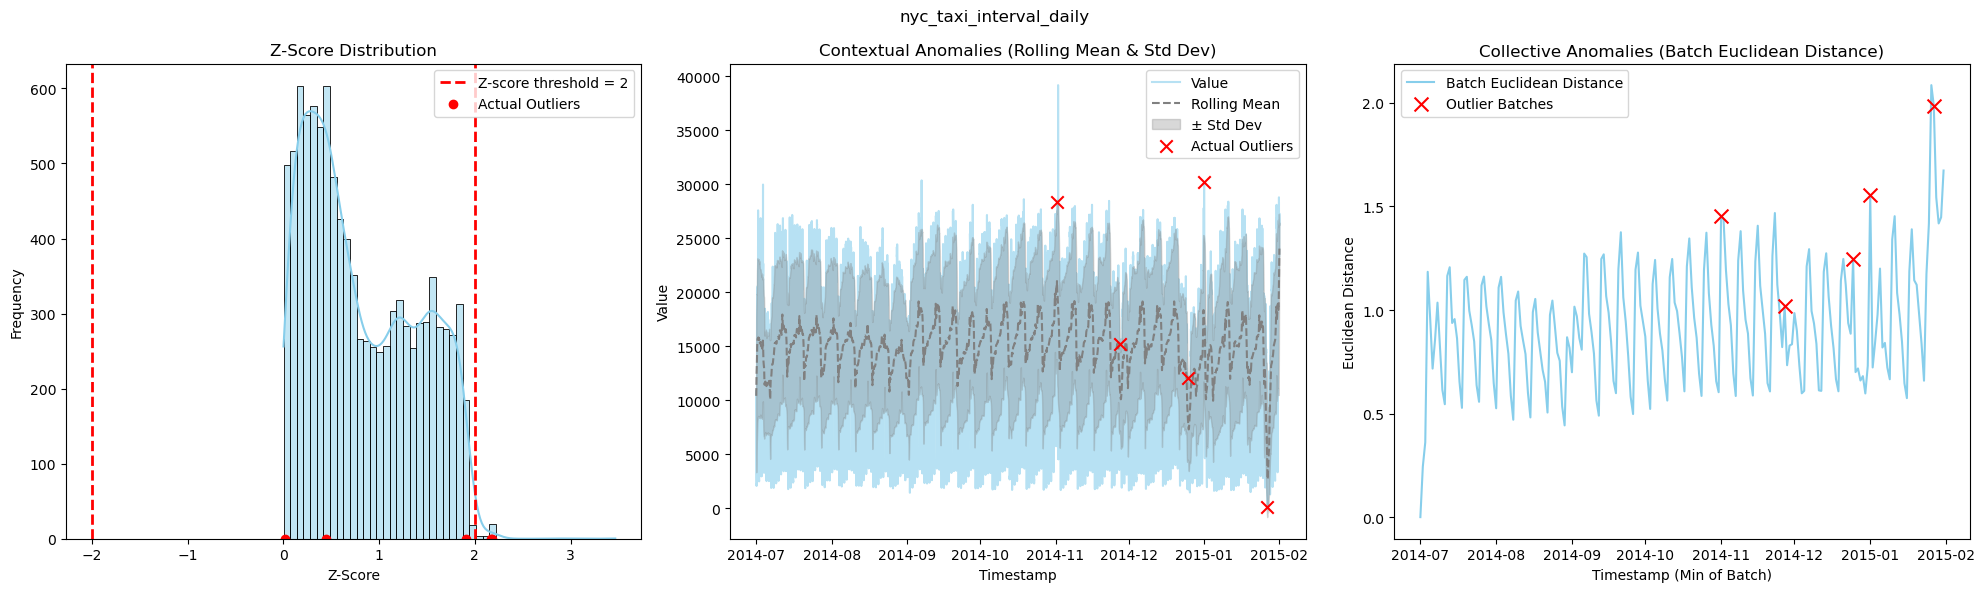

Timestamp: 2014-11-01 19:00:00, Anomaly Type: Unknown
Timestamp: 2014-11-27 15:30:00, Anomaly Type: Contextual
Timestamp: 2014-12-25 15:00:00, Anomaly Type: Contextual
Timestamp: 2015-01-01 01:00:00, Anomaly Type: Point
Timestamp: 2015-01-27 00:00:00, Anomaly Type: Point


File: nyc_taxi, interval: time_of_day


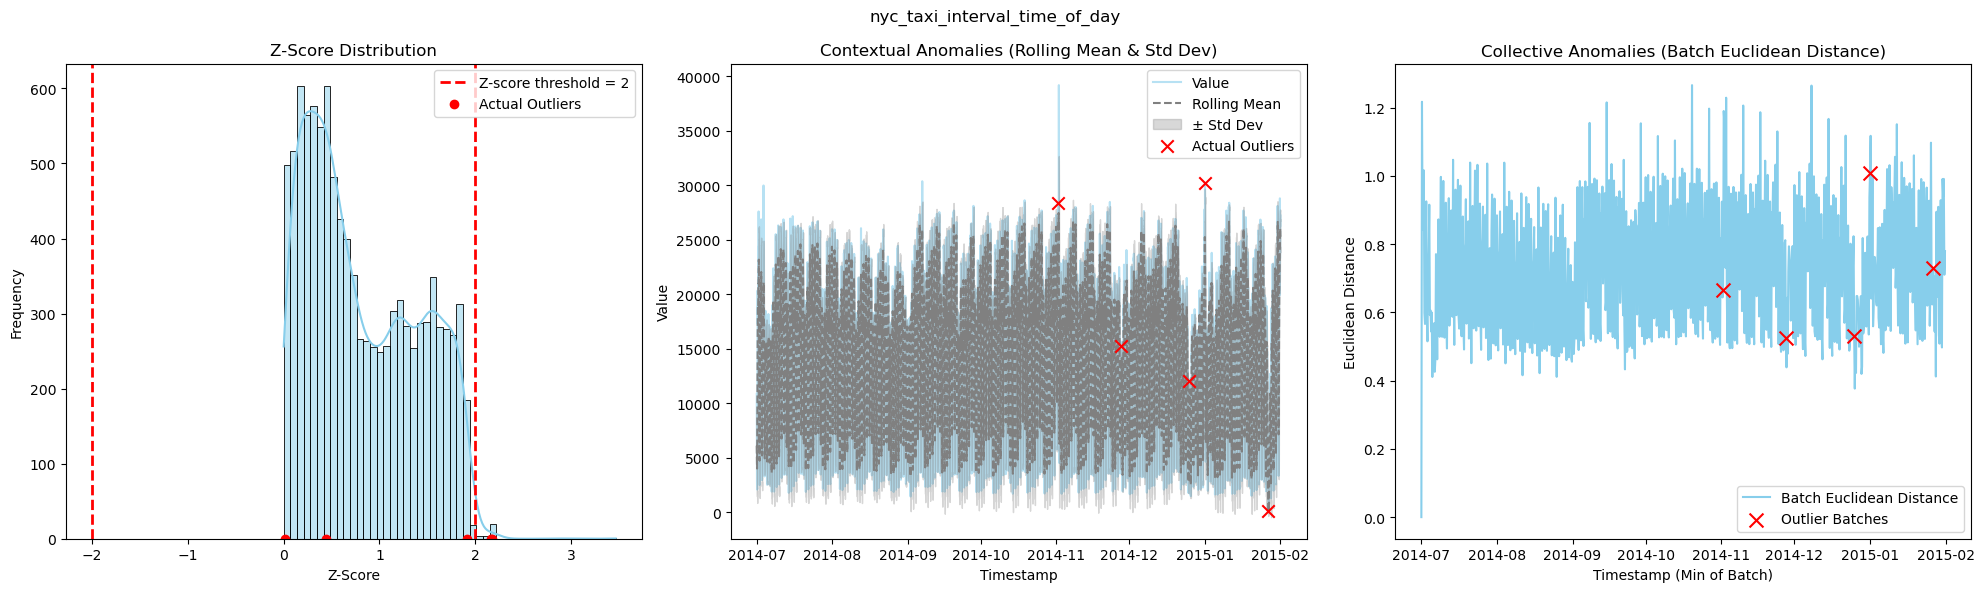

Timestamp: 2014-11-01 19:00:00, Anomaly Type: Contextual
Timestamp: 2014-11-27 15:30:00, Anomaly Type: Contextual
Timestamp: 2014-12-25 15:00:00, Anomaly Type: Contextual
Timestamp: 2015-01-01 01:00:00, Anomaly Type: Point
Timestamp: 2015-01-27 00:00:00, Anomaly Type: Point


File: rogue_agent_key_hold, interval: daily


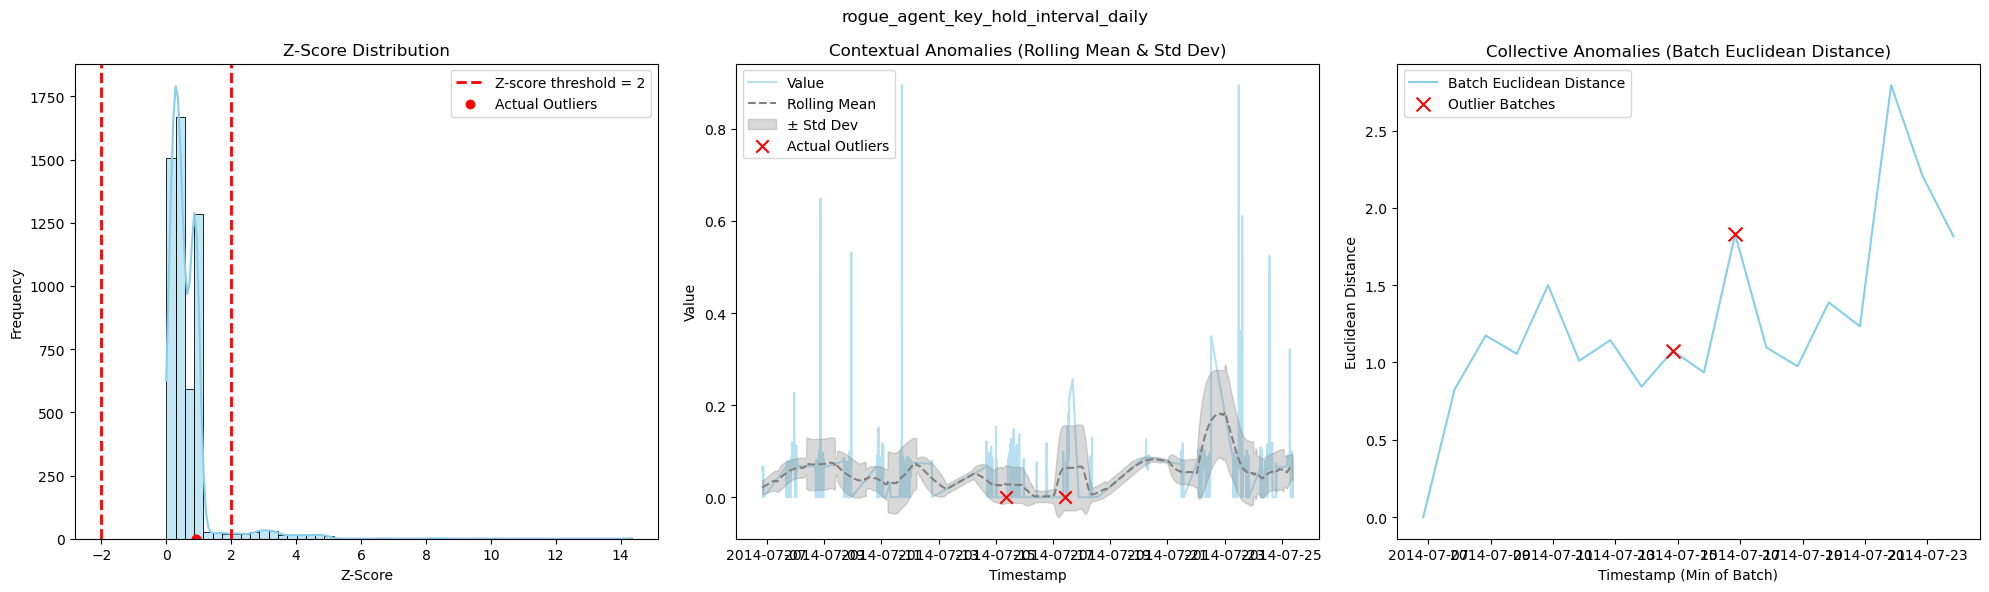

Timestamp: 2014-07-15 08:30:00, Anomaly Type: Unknown
Timestamp: 2014-07-17 09:50:00, Anomaly Type: Unknown


File: rogue_agent_key_hold, interval: time_of_day


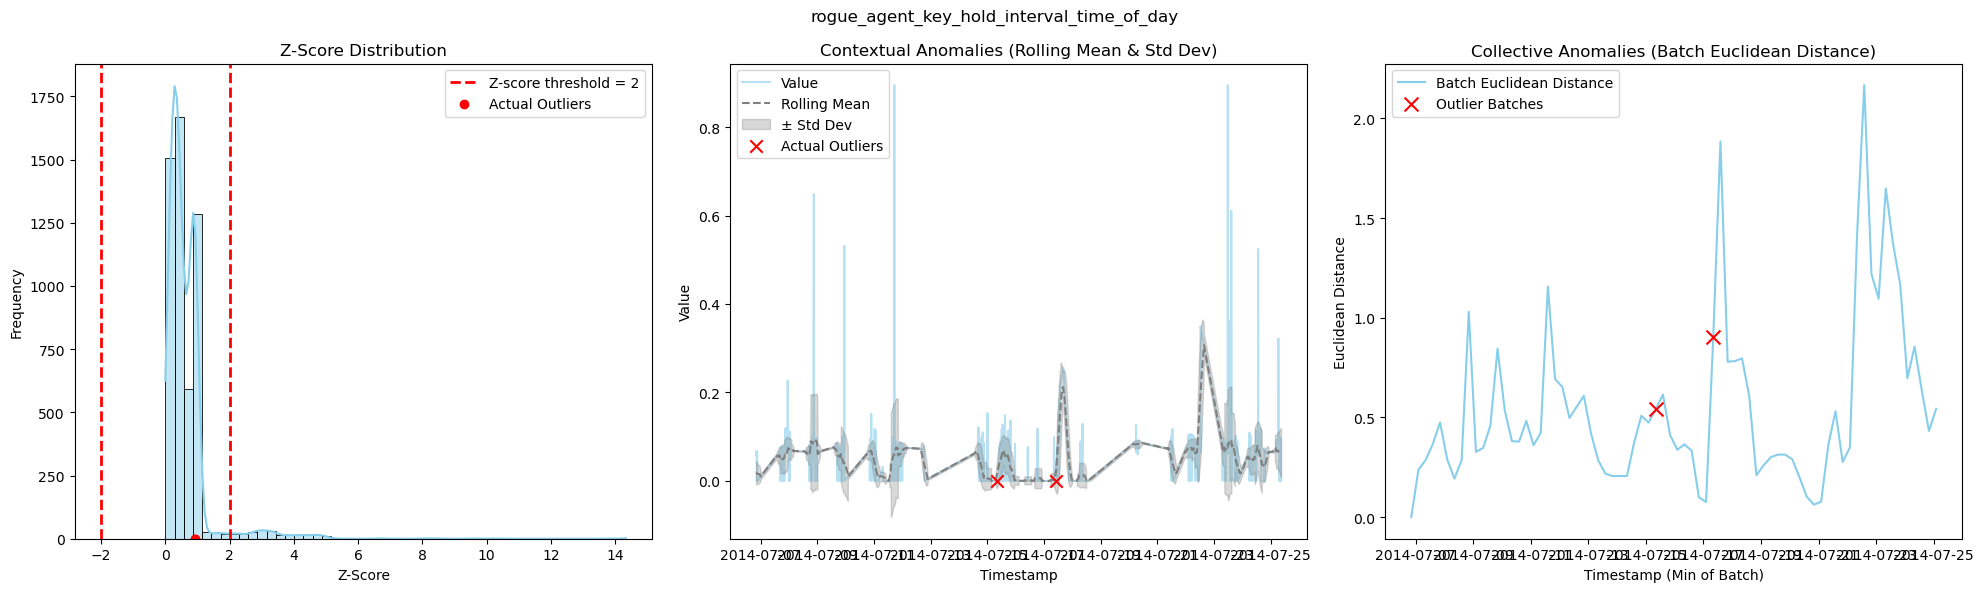

Timestamp: 2014-07-15 08:30:00, Anomaly Type: Unknown
Timestamp: 2014-07-17 09:50:00, Anomaly Type: Unknown


File: cpu_utilization_asg_misconfiguration, interval: daily


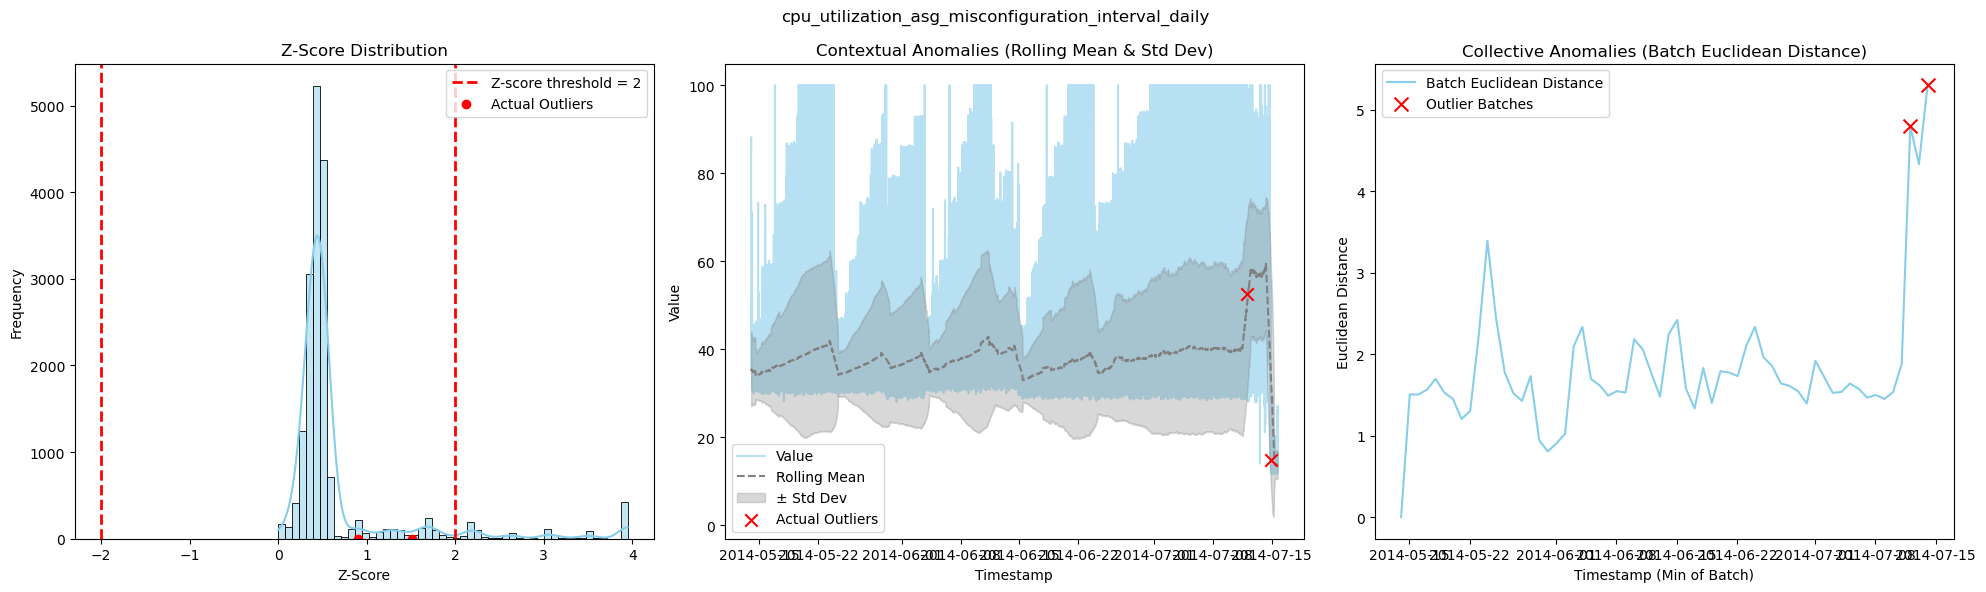

Timestamp: 2014-07-12 02:04:00, Anomaly Type: Unknown
Timestamp: 2014-07-14 21:44:00, Anomaly Type: Unknown


File: cpu_utilization_asg_misconfiguration, interval: time_of_day


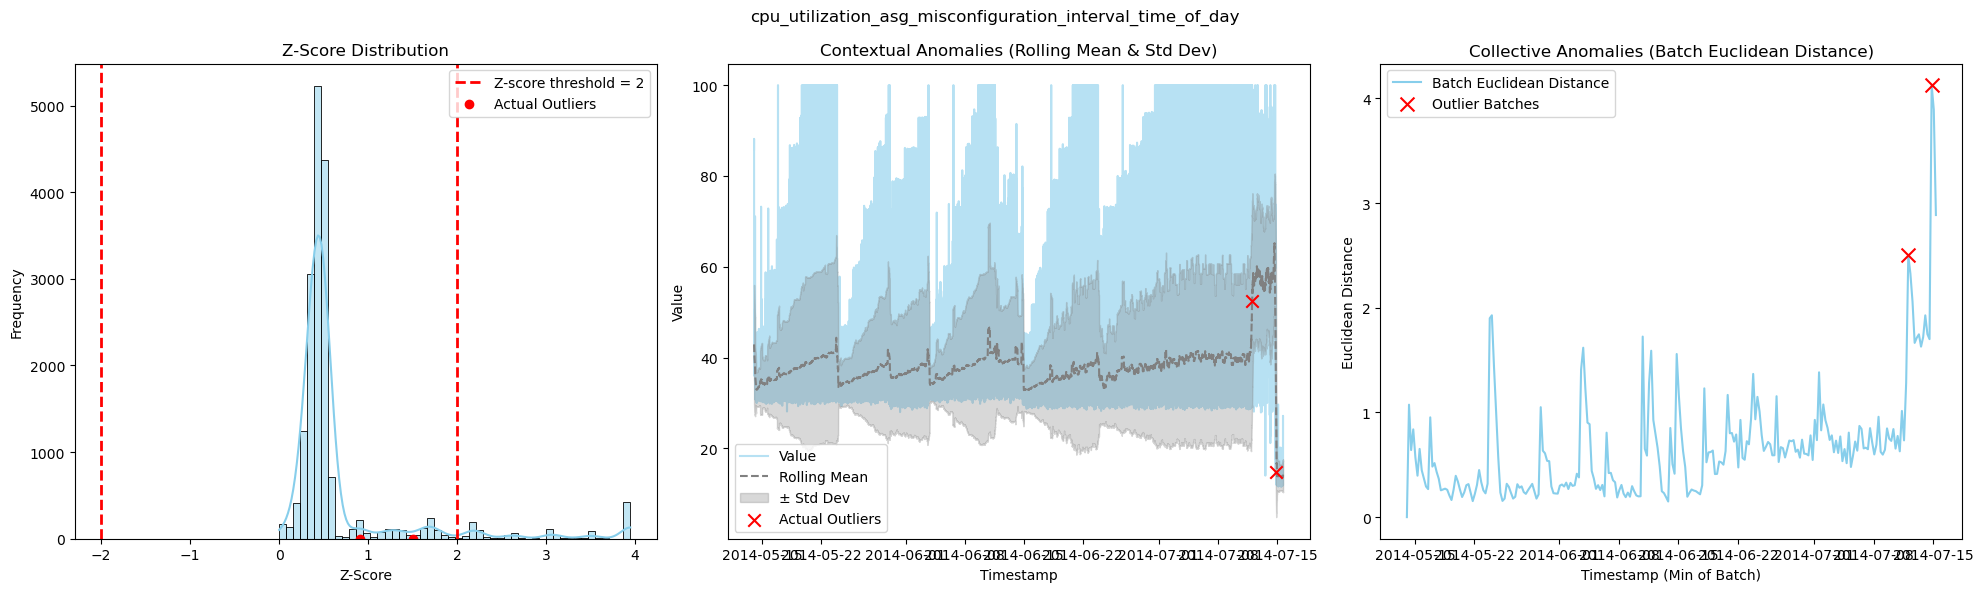

Timestamp: 2014-07-12 02:04:00, Anomaly Type: Unknown
Timestamp: 2014-07-14 21:44:00, Anomaly Type: Unknown


File: rogue_agent_key_updown, interval: daily


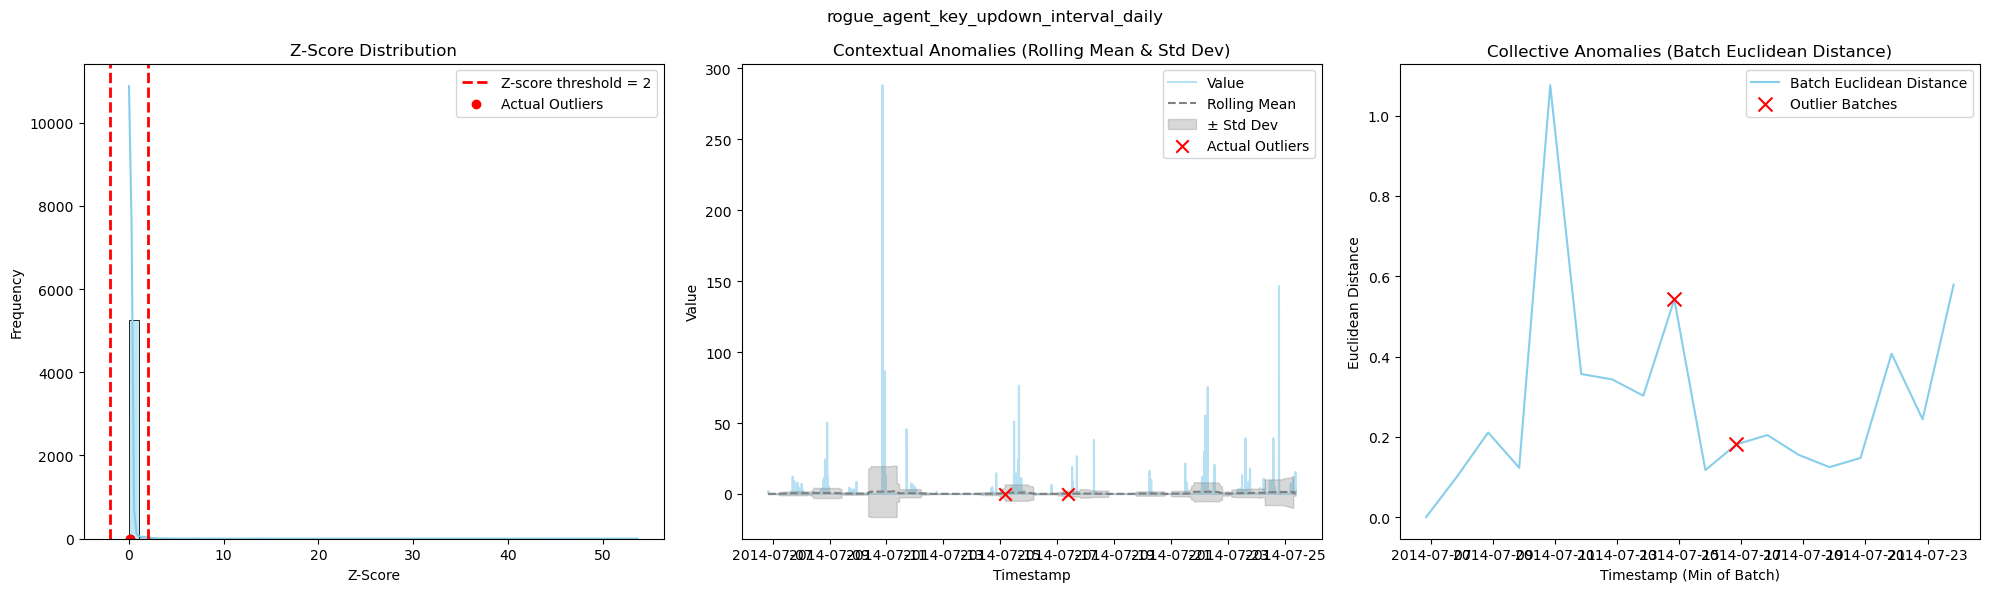

Timestamp: 2014-07-15 04:00:00, Anomaly Type: Unknown
Timestamp: 2014-07-17 08:50:00, Anomaly Type: Unknown


File: rogue_agent_key_updown, interval: time_of_day


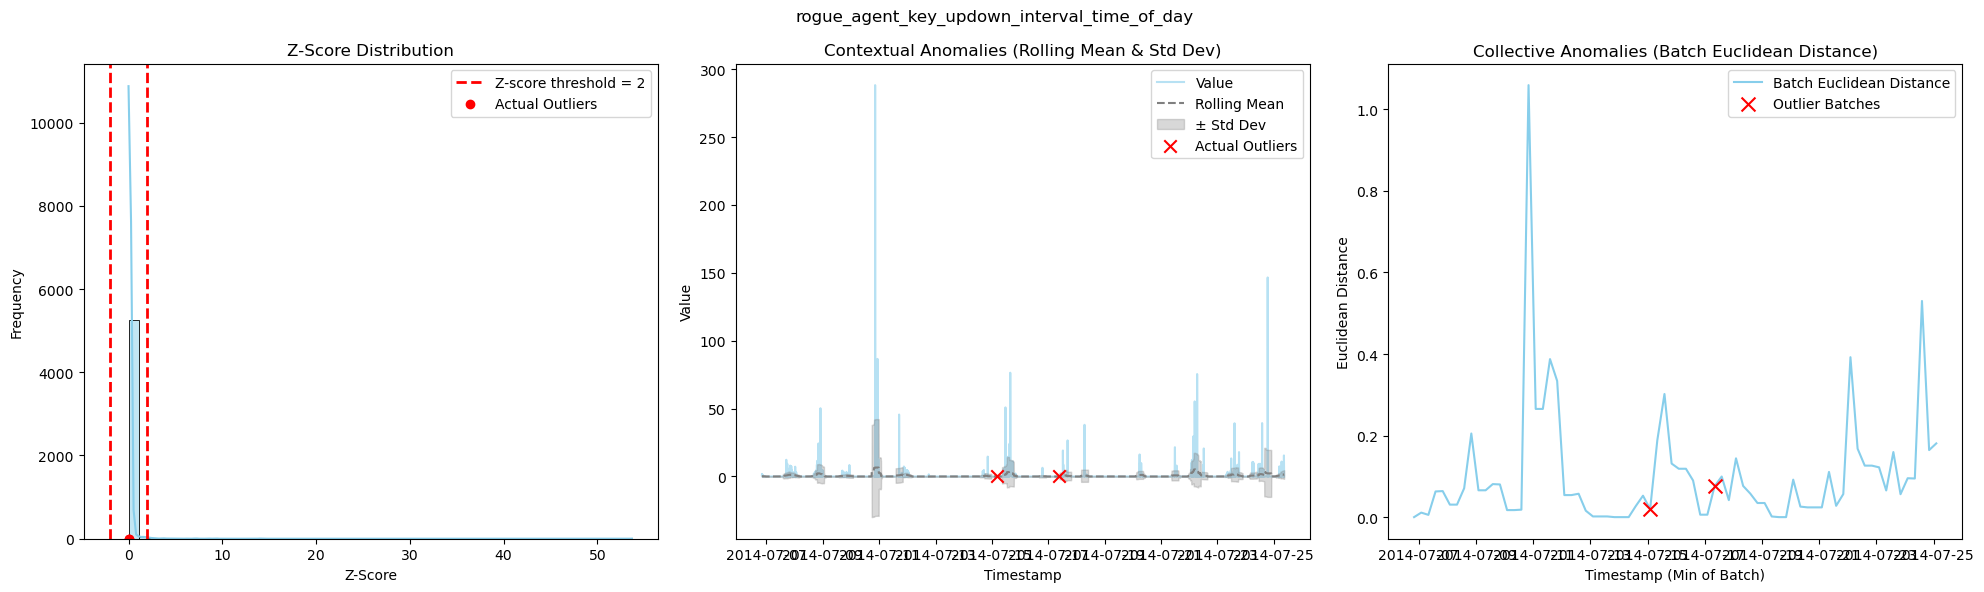

Timestamp: 2014-07-15 04:00:00, Anomaly Type: Unknown
Timestamp: 2014-07-17 08:50:00, Anomaly Type: Unknown


File: ambient_temperature_system_failure, interval: daily


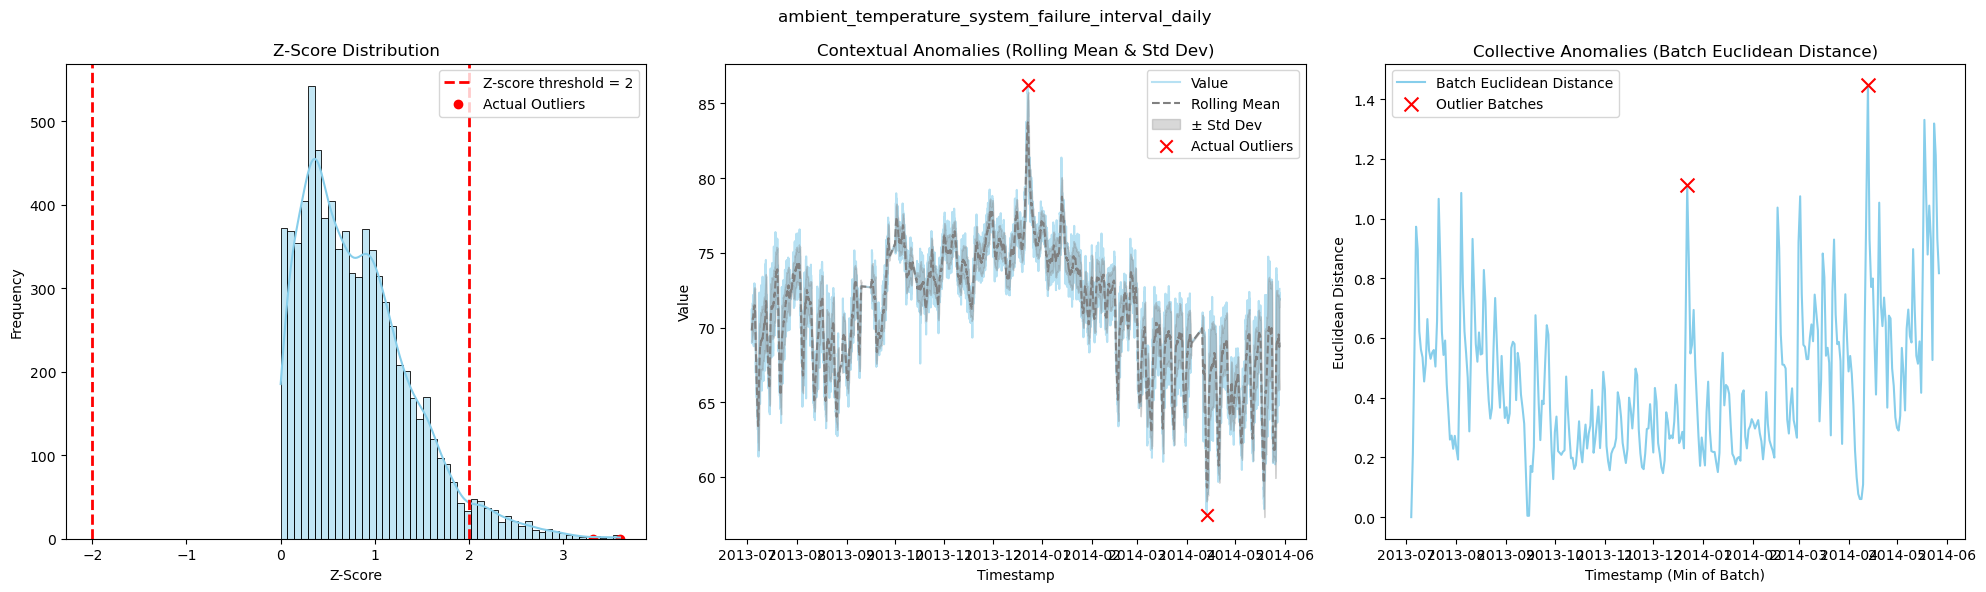

Timestamp: 2013-12-22 20:00:00, Anomaly Type: Point
Timestamp: 2014-04-13 09:00:00, Anomaly Type: Point


File: ambient_temperature_system_failure, interval: time_of_day


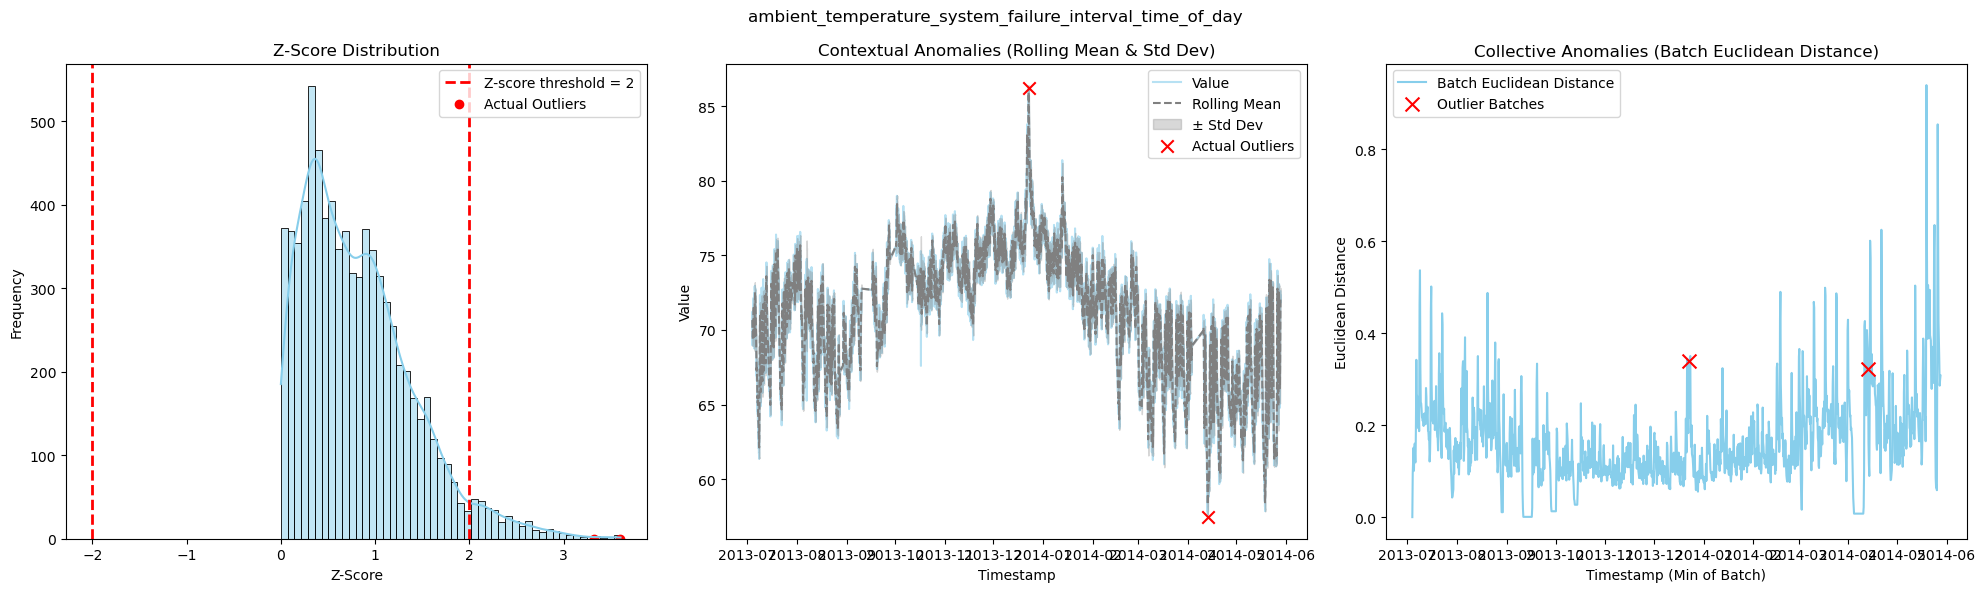

Timestamp: 2013-12-22 20:00:00, Anomaly Type: Point
Timestamp: 2014-04-13 09:00:00, Anomaly Type: Point


File: machine_temperature_system_failure, interval: daily


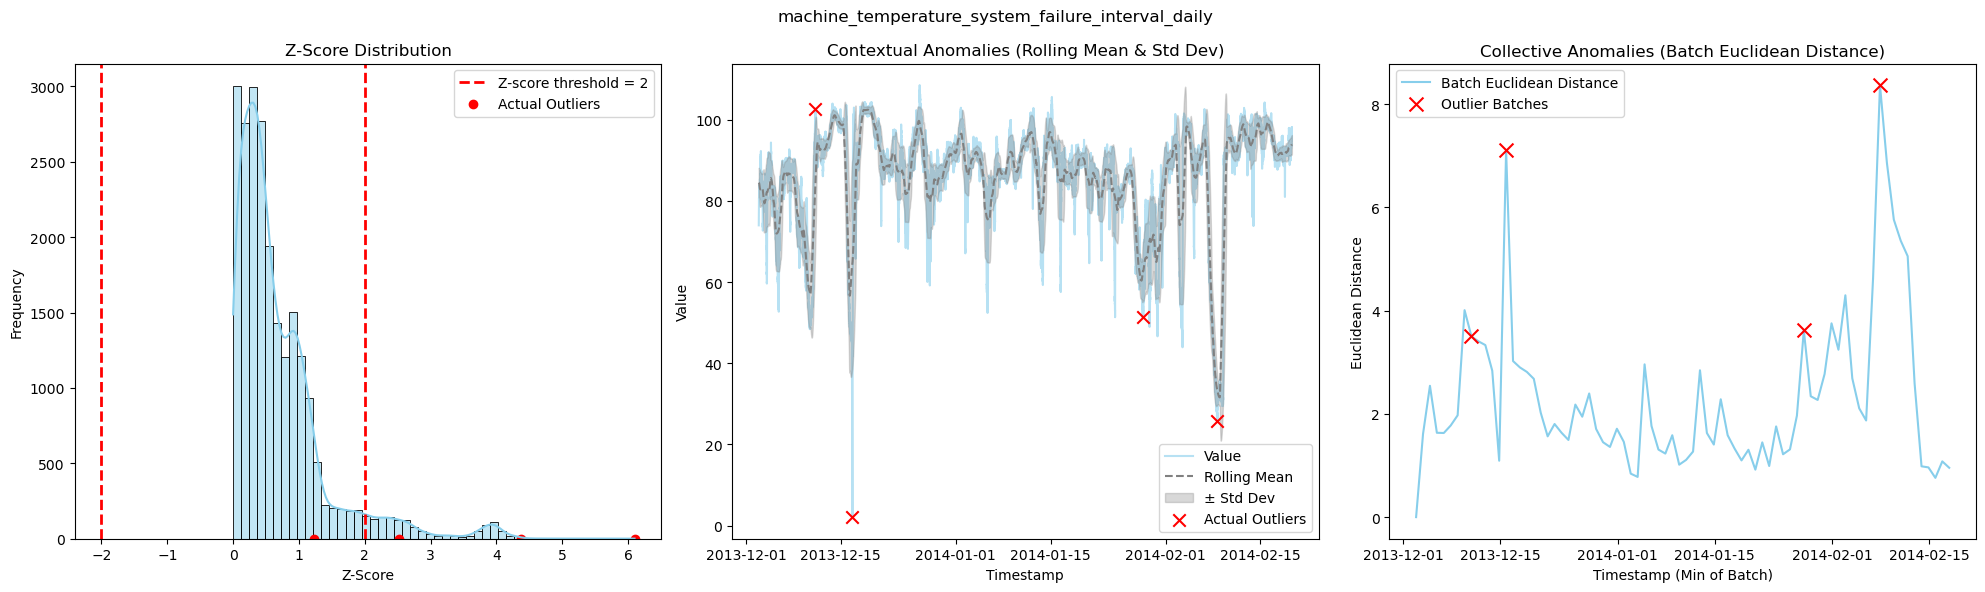

Timestamp: 2013-12-11 06:00:00, Anomaly Type: Contextual
Timestamp: 2013-12-16 17:25:00, Anomaly Type: Point
Timestamp: 2014-01-28 13:55:00, Anomaly Type: Point
Timestamp: 2014-02-08 14:30:00, Anomaly Type: Point


File: machine_temperature_system_failure, interval: time_of_day


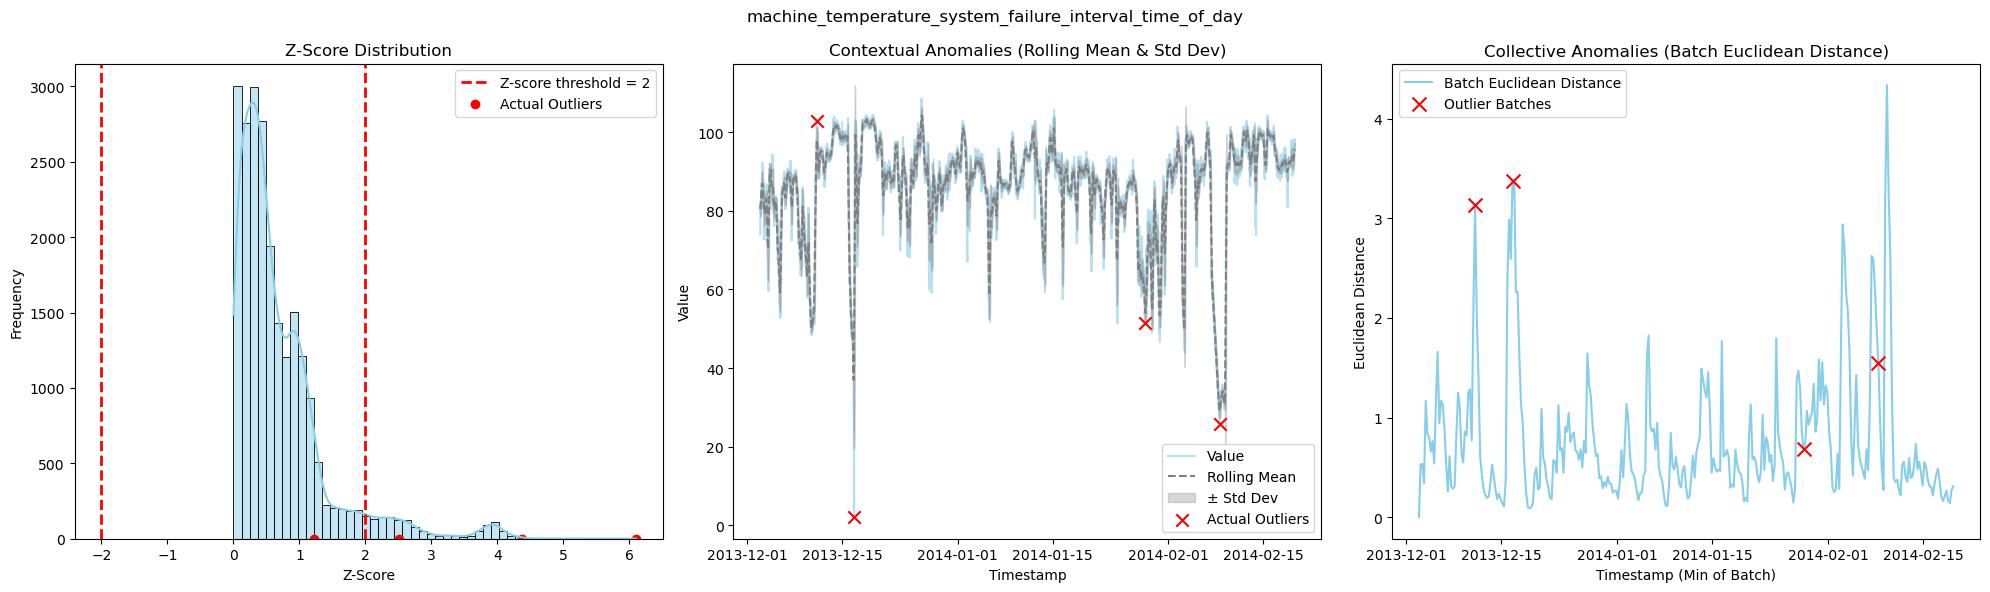

Timestamp: 2013-12-11 06:00:00, Anomaly Type: Contextual
Timestamp: 2013-12-16 17:25:00, Anomaly Type: Point
Timestamp: 2014-01-28 13:55:00, Anomaly Type: Point
Timestamp: 2014-02-08 14:30:00, Anomaly Type: Point


File: ec2_request_latency_system_failure, interval: daily


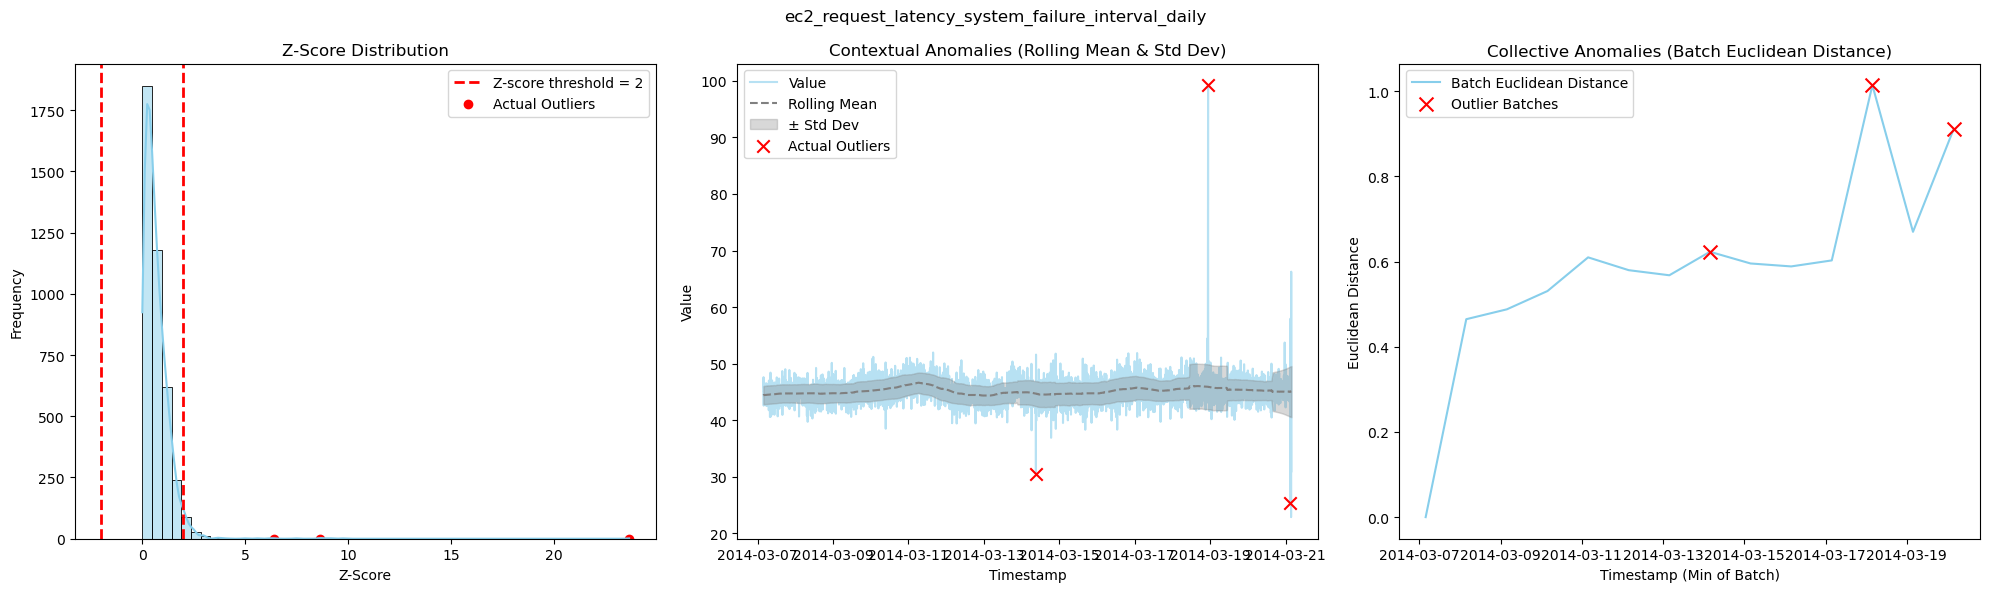

Timestamp: 2014-03-14 09:06:00, Anomaly Type: Point
Timestamp: 2014-03-18 22:41:00, Anomaly Type: Point
Timestamp: 2014-03-21 03:01:00, Anomaly Type: Point


File: ec2_request_latency_system_failure, interval: time_of_day


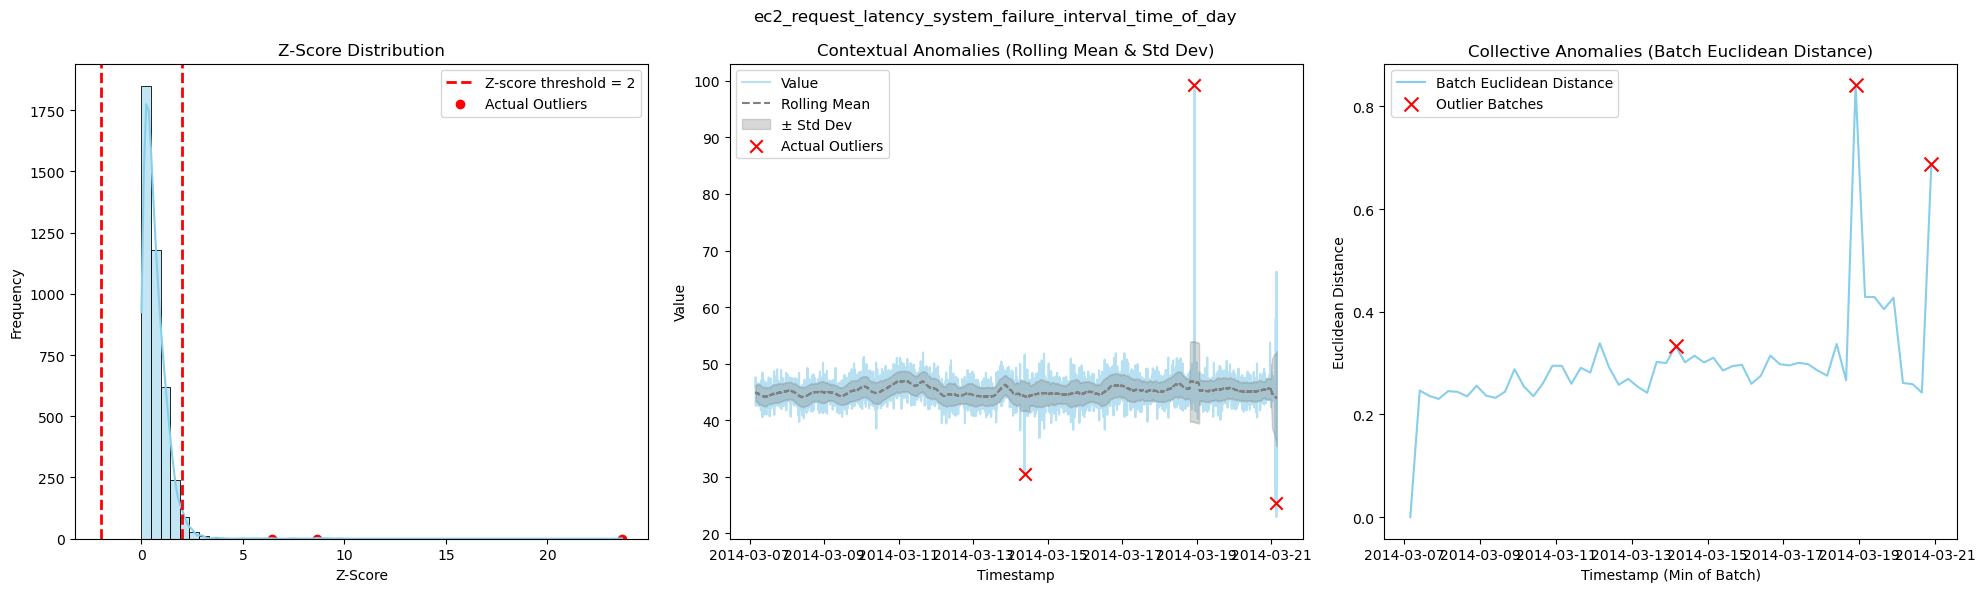

Timestamp: 2014-03-14 09:06:00, Anomaly Type: Point
Timestamp: 2014-03-18 22:41:00, Anomaly Type: Point
Timestamp: 2014-03-21 03:01:00, Anomaly Type: Point




In [6]:
for filename, data, window in zip(file_names, preprocessed_dfs, window_sizes):
    name = filename.split('/')[-1]
    name = name.split('.')[0].strip()
    windows = window.values()
    keys = list(window.keys())
    for i, window in enumerate(windows):
        print(f'File: {name}, interval: {keys[i]}')
        filename = f'{name}_interval_{keys[i]}'
        d = ac.categorize_anomalies(data, window_size=window, filename=filename)
        
        # Select only actual outliers
        outliers = d[d['outlier'] == 1][['timestamp', 'value', 'anomaly_type']]

        # Print each outlier’s classification
        for _, row in outliers.iterrows():
            print(f"Timestamp: {row['timestamp']}, Anomaly Type: {row['anomaly_type']}")
        print('\n')